In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import random
import numpy as np

import seaborn as sns

In [2]:
import matplotlib 
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [3]:
# TFs to look at

# Sef1
# Pdr1
# Sum1
# Oaf1
# Pip2
# Put3
# Aro80
# Stb4
# War1
# Ppr1
# Gal4

# Oaf3
# Rds1 - No syntenic genes

# Yrr1
# Tog1 --> Only a few syntenic genes, have to use Y... name
# Yrm1
# Urc2
# YJL206C
# Gln3
# YKL222C - No syntenic genes
# Haa1
# Cha4
# Rdr1 - Not many seqs
# Gat1
# Rtg3
# Aft2
# Hac1
# Cup2

TFs = [
"Sef1",
"Pdr1",
"Sum1",
"Oaf1",
"Pip2",
"Put3",
"Aro80",
"Stb4",
"War1",
"Ppr1",
"Gal4",
"Oaf3",
"Yrr1",
"Yrm1",
"Urc2",
"Gln3",
"Haa1",
"Cha4",
"Rdr1",
"Gat1",
"Rtg3",
"Aft2",
"Hac1",
"Cup2"]

In [4]:
def read_fasta(file):

    with open(file, "r") as f:
        lines = f.readlines()

    seq = ""
    seqs = []
    names = []

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">", ""))
            if len(names) > 1:
                seqs.append(seq.replace("*", ""))
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq.replace("*", ""))

    return pd.DataFrame({"name" : names, "aa_seq" : seqs})

In [13]:
def get_observed(seqs): 
    ends = []
    for seq in seqs: 
      end = seq[-1]
      ends.append(end)
    return ends

def generate_random_ends(seqs):
  permutations = []
  for i in range(1000):
    shuffled_ends = []
    for seq in seqs: 
      shuffled_end = random.sample(list(seq), len(seq))[-1]
      shuffled_ends.append(shuffled_end)
    permutations.append(shuffled_ends)
  return permutations

def percent_hydrophobic(ls):
    return (ls.count("W") + ls.count("F") + ls.count("Y") + ls.count("M") + ls.count("L") + ls.count("V") + ls.count("A") + ls.count("I")) / len(ls)

def percent_charged(ls):
    return (ls.count("D") + ls.count("E") + ls.count("K") + ls.count("R")) / len(ls)

In [ ]:
# Sef1 0.0
# Pdr1 0.1913
# Sum1 0.7412
# Oaf1 0.9935
# Pip2 0.9924
# Put3 0.962
# Aro80 0.9827
# Stb4 0.0005
# War1 0.1277
# Ppr1 0.0
# Gal4 0.4531
# Oaf3 0.0492
# Yrr1 0.1616
# Yrm1 0.5425
# Urc2 0.4197
# Gln3 0.0
# Haa1 0.0004
# Cha4 0.1177
# Rdr1 0.0
# Gat1 0.0002
# Rtg3 1.0
# Aft2 0.9124
# Hac1 0.2293
# Cup2 0.0004

In [8]:
def generate_random_ends_strict(seqs):
  permutations = []
  for i in range(10000):
    shuffled_ends = []
    for seq in seqs: 
      shuffled_end = random.sample(list(seq[-10:]), 10)[-1]
      shuffled_ends.append(shuffled_end)
    permutations.append(shuffled_ends)
  return permutations

In [ ]:
from statsmodels.stats.multitest import multipletests

for p in TF_ends_df["pval"]:
    adj_p = multipletests(p, method="bonferroni")[1]
    print(adj_p)

In [15]:
# Empirical p-values
# How often would you expect 
pvals_hydro = []
for TF in TFs:
    TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
    # print("Total seqs:", len(TF_seqs))

    permutations = generate_random_ends_strict(TF_seqs["aa_seq"].values)

    observed = get_observed(TF_seqs['aa_seq'].values)

    hydrophobics = []

    for perm in permutations:
        hydrophobics.append(percent_hydrophobic(perm))

    pvals_hydro.append(sum([h > percent_hydrophobic(observed) for h in hydrophobics]) / 10000)
    # print(TF, sum([h > percent_hydrophobic(observed) for h in hydrophobics]) / 10000)
    
    # print(TF, sum([h < percent_hydrophobic(observed) for h in hydrophobics]) / 10000)

In [25]:
# Empirical p-values
# How often would you expect 
pvals_charged = []
for TF in TFs:
    TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
    # print("Total seqs:", len(TF_seqs))

    permutations = generate_random_ends_strict(TF_seqs["aa_seq"].values)

    observed = get_observed(TF_seqs['aa_seq'].values)

    hydrophobics = []

    for perm in permutations:
        hydrophobics.append(percent_charged(perm))

    pvals_charged.append(sum([h > percent_charged(observed) for h in hydrophobics]) / 10000)
    print(TF, sum([h > percent_charged(observed) for h in hydrophobics]) / 10000)
    
    print(TF, sum([h < percent_charged(observed) for h in hydrophobics]) / 10000)

Sef1 0.9965
Sef1 0.0
Pdr1 0.5776
Pdr1 0.2474
Sum1 0.3338
Sum1 0.4654
Oaf1 0.12
Oaf1 0.7756
Pip2 0.1154
Pip2 0.779
Put3 0.1205
Put3 0.7456
Aro80 0.0236
Aro80 0.9272
Stb4 0.5953
Stb4 0.2325
War1 0.1654
War1 0.6678
Ppr1 0.2289
Ppr1 0.5291
Gal4 0.0014
Gal4 0.9931
Oaf3 0.8261
Oaf3 0.0503
Yrr1 0.4334
Yrr1 0.3799
Yrm1 0.3997
Yrm1 0.3359
Urc2 0.0024
Urc2 0.9893
Gln3 1.0
Gln3 0.0
Haa1 0.5976
Haa1 0.2295
Cha4 0.0165
Cha4 0.9447
Rdr1 0.6237
Rdr1 0.0
Gat1 0.4106
Gat1 0.3044
Rtg3 0.1818
Rtg3 0.6611
Aft2 0.1485
Aft2 0.7324
Hac1 0.6511
Hac1 0.1617
Cup2 0.5961
Cup2 0.2298


In [27]:
TF_ends_df

,index,Transcription Factor,Percent hydrophobic ending amino acid,Percent charged ending amino acid,pval_hydro,pval_charged,opposite pval
23,0,Sef1,1.000000,0.000000,0.0000,0.9967,1.0000
21,15,Gln3,1.000000,0.000000,0.0000,0.9998,1.0000
22,18,Rdr1,1.000000,0.000000,0.0000,0.6347,1.0000
18,11,Oaf3,0.650000,0.100000,0.0469,0.8325,0.9531
20,19,Gat1,0.842105,0.105263,0.0003,0.4177,0.9997
12,22,Hac1,0.500000,0.136364,0.2269,0.6670,0.7731
17,23,Cup2,0.645161,0.161290,0.0004,0.5953,0.9996
16,16,Haa1,0.645161,0.161290,0.0003,0.5950,0.9997
15,7,Stb4,0.645161,0.161290,0.0007,0.5940,0.9993
11,1,Pdr1,0.428571,0.178571,0.1909,0.5770,0.8091


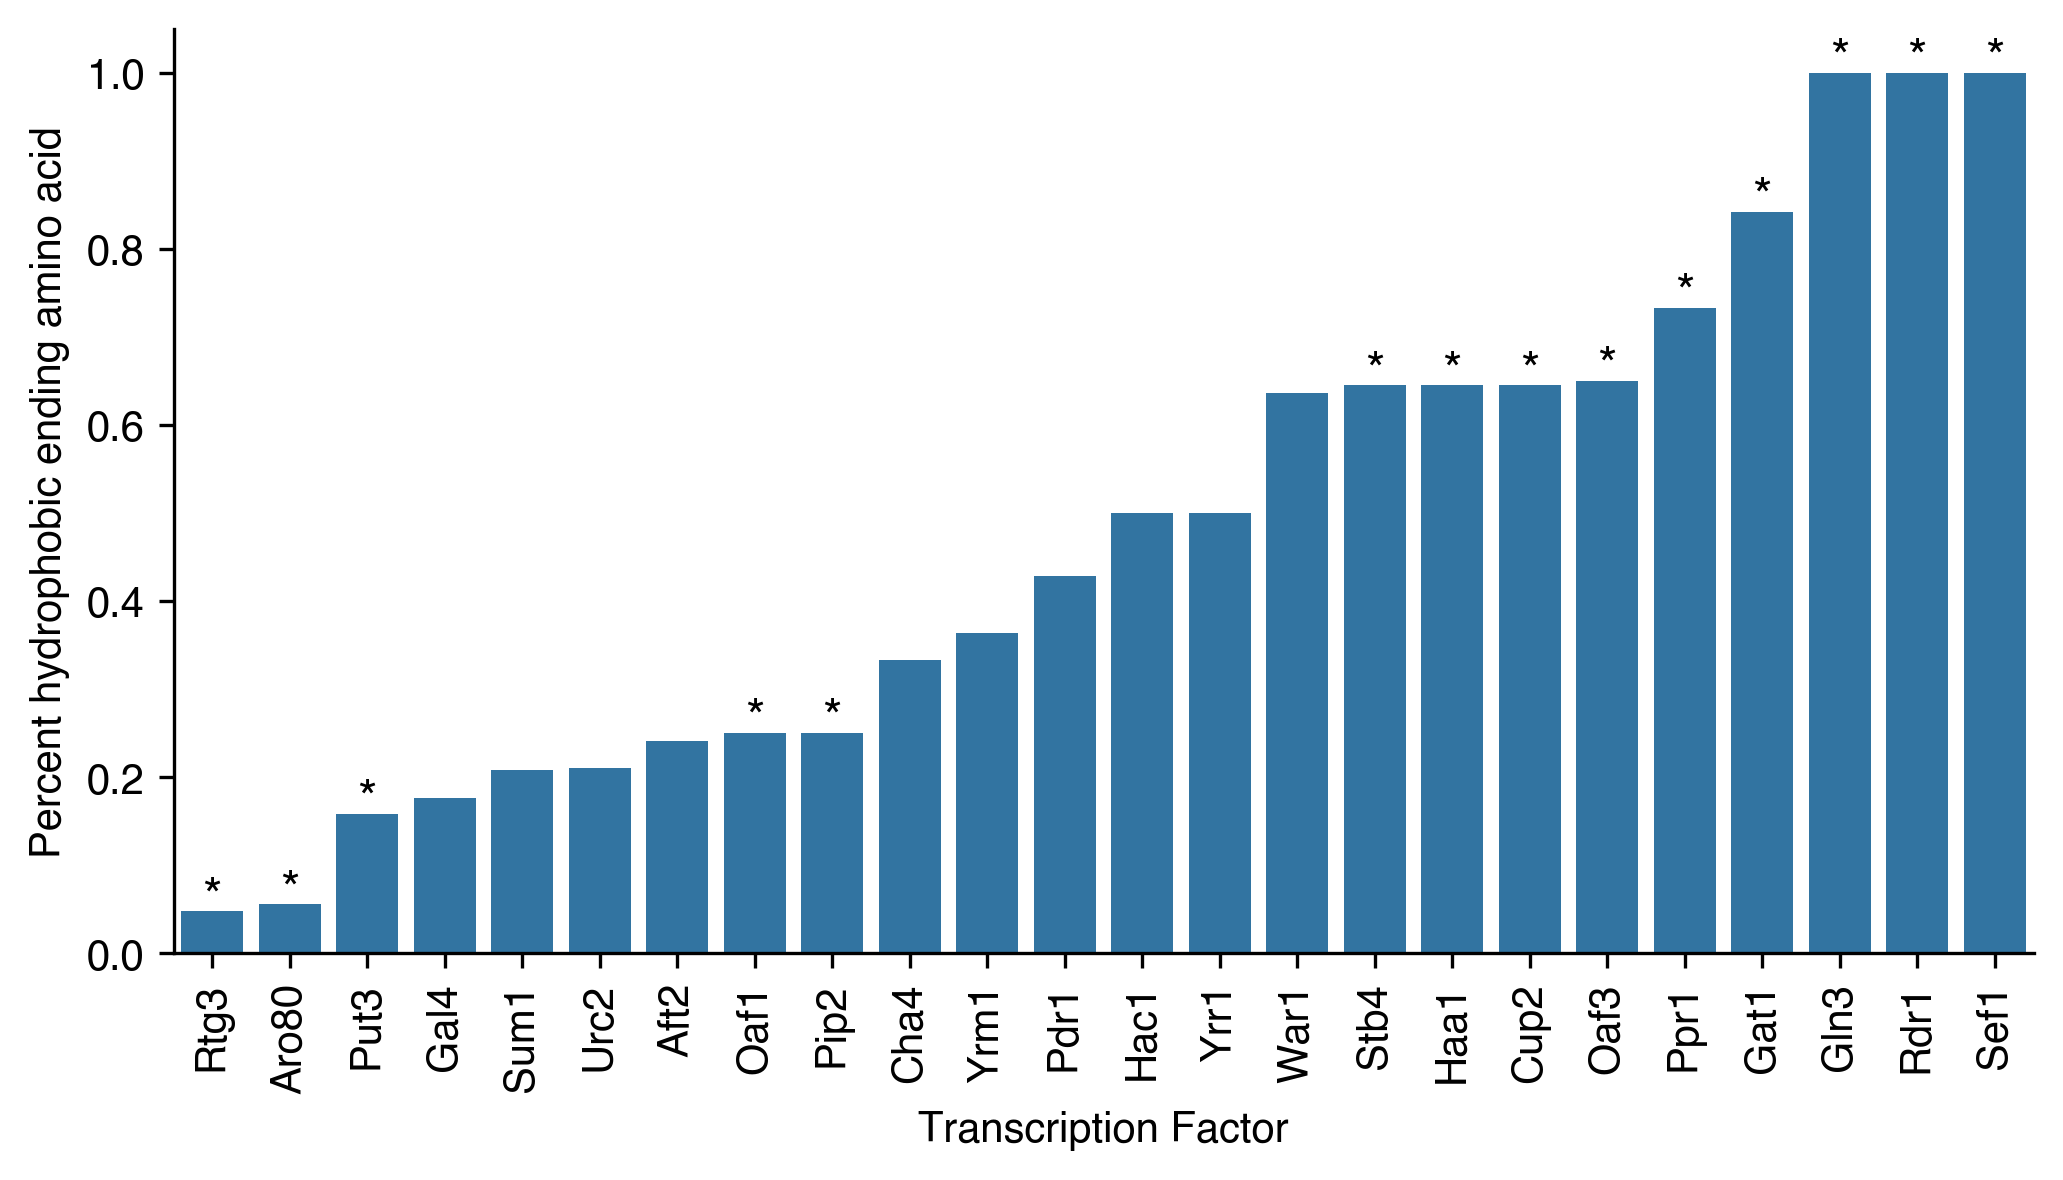

In [21]:
observed_hydro_rates = []
for TF in TFs:
    TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
    observed = percent_hydrophobic(get_observed(TF_seqs['aa_seq'].values))
    observed_hydro_rates.append(observed)

observed_charged_rates = []
for TF in TFs:
    TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
    observed = percent_charged(get_observed(TF_seqs['aa_seq'].values))
    observed_charged_rates.append(observed)

TF_ends_df = pd.DataFrame({"Transcription Factor" : TFs, "Percent hydrophobic ending amino acid" : observed_hydro_rates, "Percent charged ending amino acid" : observed_charged_rates})
TF_ends_df["pval_hydro"] = pvals_hydro
TF_ends_df["pval_charged"] = pvals_charged
TF_ends_df = TF_ends_df.sort_values("Percent hydrophobic ending amino acid")
TF_ends_df = TF_ends_df.reset_index()
TF_ends_df["opposite pval"] = 1 - TF_ends_df["pval_hydro"]

fig, ax = plt.subplots(figsize=(8, 4))   
bars = sns.barplot(data=TF_ends_df, y="Percent hydrophobic ending amino acid", x="Transcription Factor", ax=ax)
plt.xticks(rotation=90)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if TF_ends_df.loc[x, "pval_hydro"] < 0.05:
        y = height #+ 0.001  # Adjust offset as needed
        ax.text(x, y, '*', ha='center', fontsize=12)
    if TF_ends_df.loc[x, "opposite pval"] < 0.05:
        y = height #+ 0.001  # Adjust offset as needed
        ax.text(x, y, '*', ha='center', fontsize=12)

sns.despine()
# plt.savefig("../figures/fraction_hydrophobic_ends.png", bbox_inches='tight')
# plt.savefig("../figures/fraction_hydrophobic_ends.pdf",  format='pdf', bbox_inches='tight')

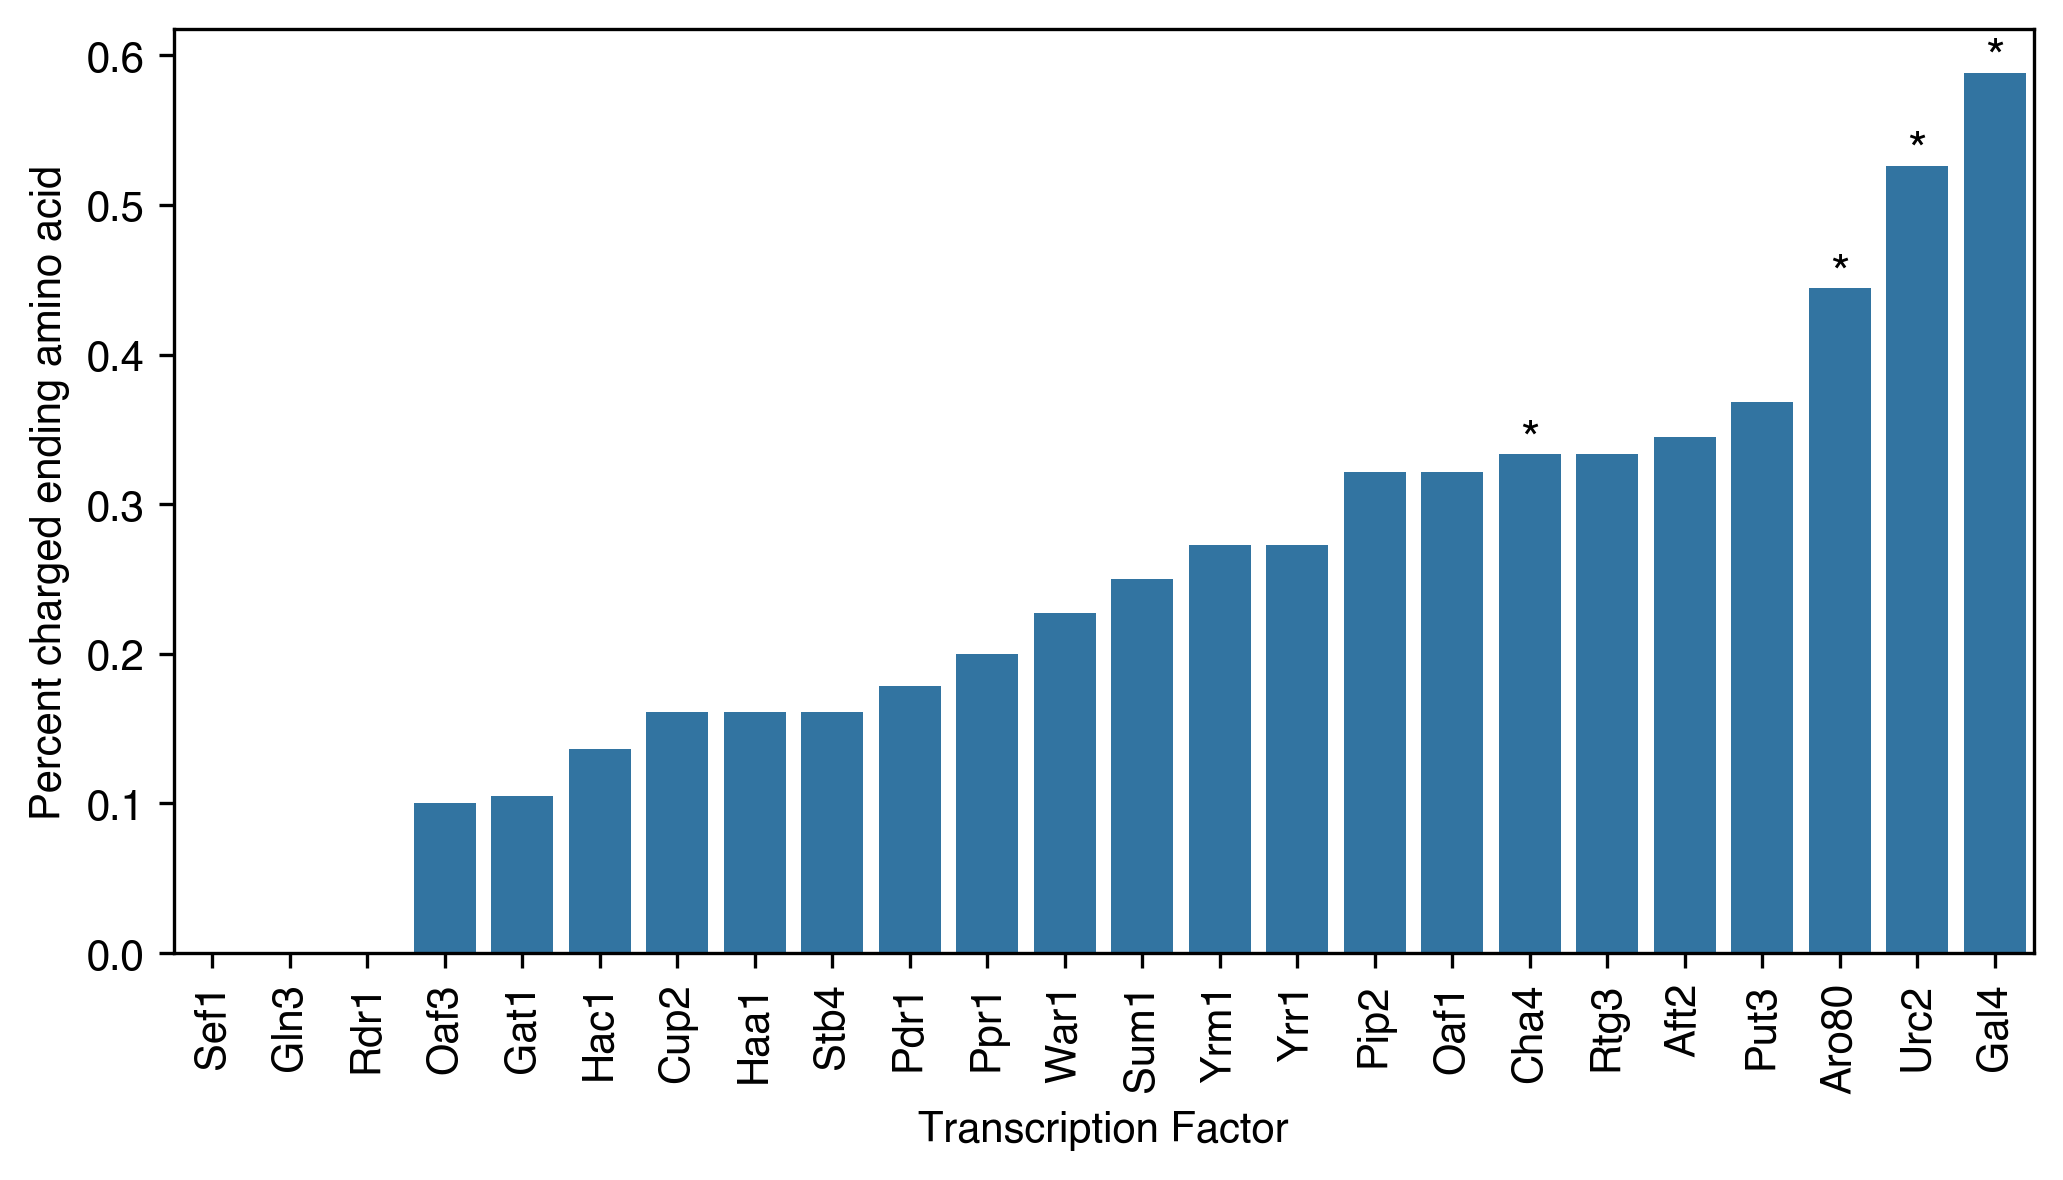

In [28]:
TF_ends_df = TF_ends_df.sort_values("Percent charged ending amino acid")
TF_ends_df = TF_ends_df.reset_index()
fig, ax = plt.subplots(figsize=(8, 4))   
bars = sns.barplot(data=TF_ends_df, y="Percent charged ending amino acid", x="Transcription Factor", ax=ax)
plt.xticks(rotation=90)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    if TF_ends_df.loc[x, "pval_charged"] < 0.05:
        y = height #+ 0.001  # Adjust offset as needed
        ax.text(x, y, '*', ha='center', fontsize=12)
    # if TF_ends_df.loc[x, "opposite pval"] < 0.05:
    #     y = height #+ 0.001  # Adjust offset as needed
    #     ax.text(x, y, '*', ha='center', fontsize=12)

Total seqs: 22


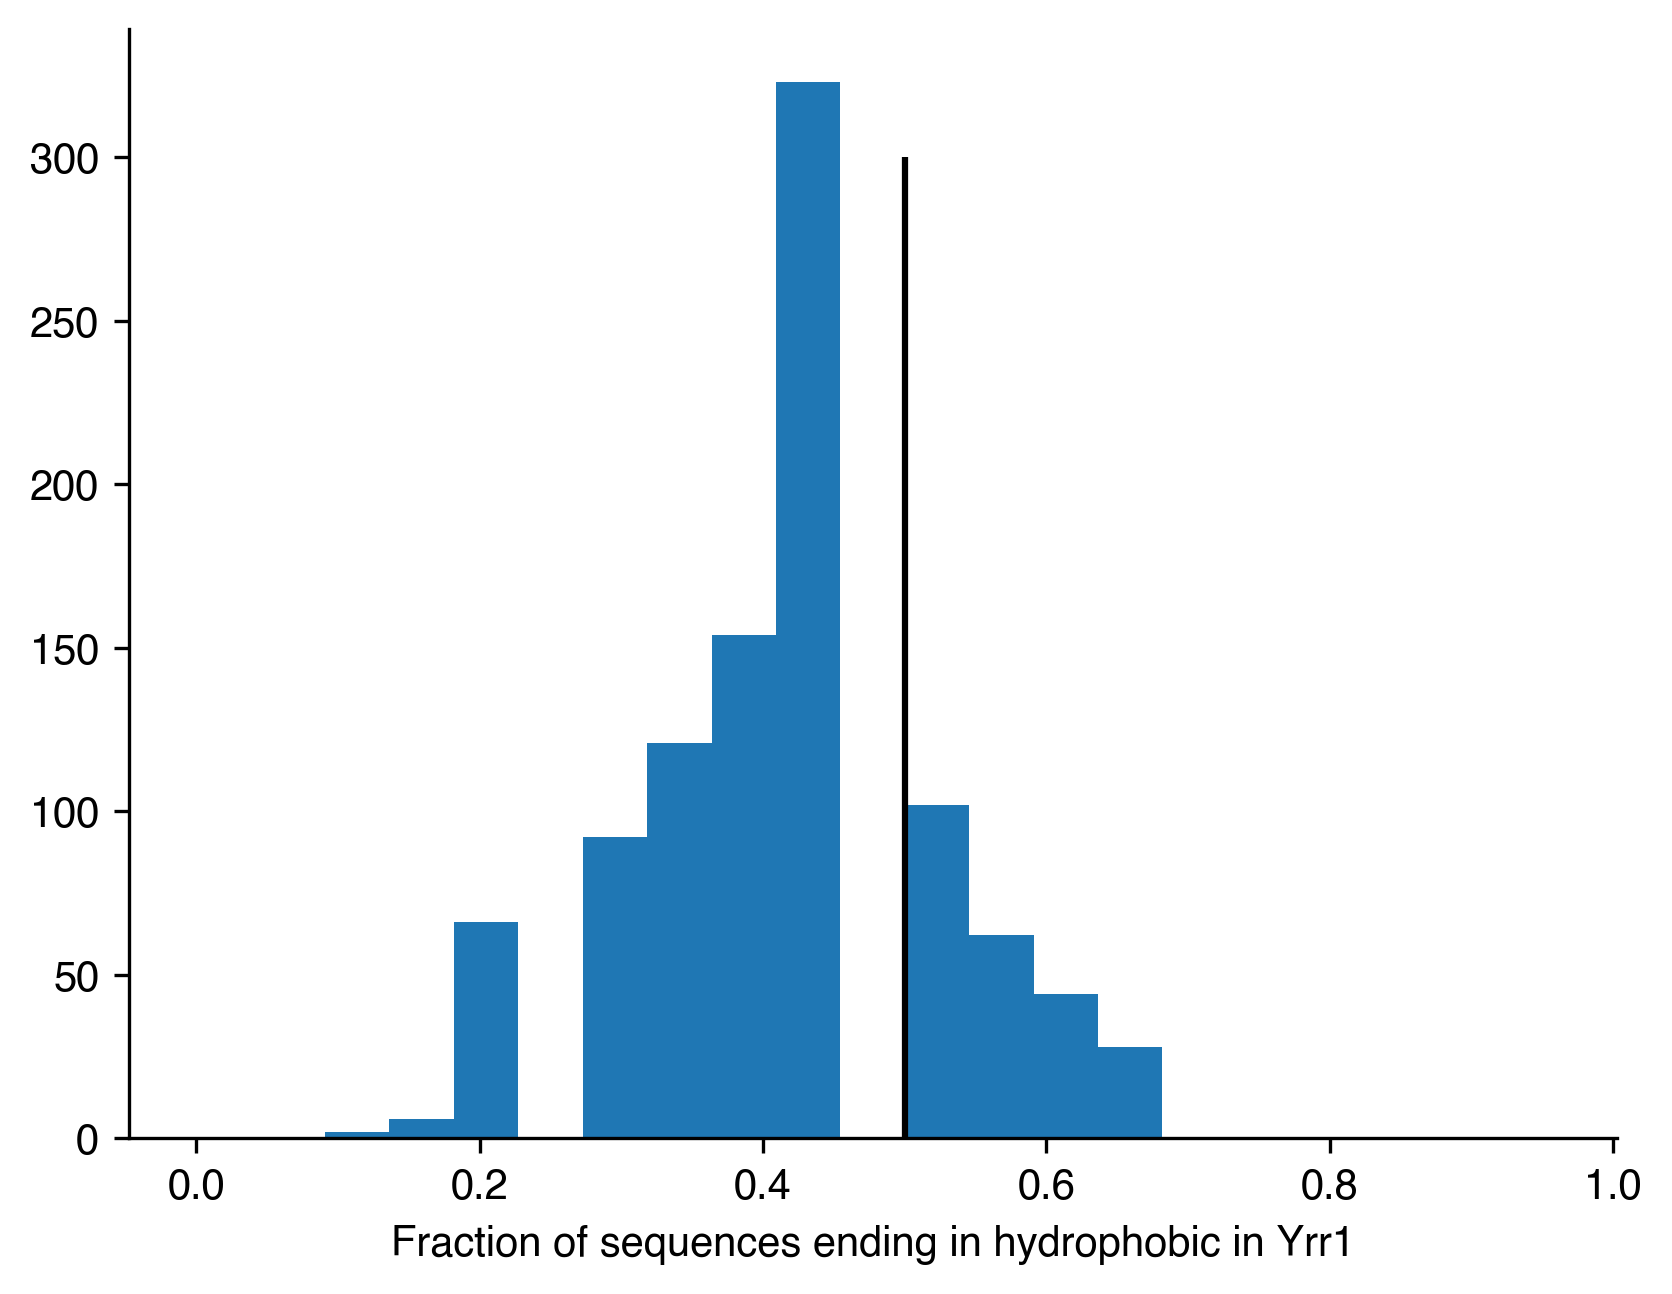

In [7]:
import numpy as np

TF = "Yrr1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
print("Total seqs:", len(TF_seqs))

permutations = generate_random_ends(TF_seqs["aa_seq"].values)

observed = get_observed(TF_seqs['aa_seq'].values)

hydrophobics = []

for perm in permutations:
    hydrophobics.append(percent_hydrophobic(perm))

plt.hist(hydrophobics, bins=np.arange(0, 1, 1/len(TF_seqs)))
plt.vlines(percent_hydrophobic(observed), ymin=0, ymax=300, color="black")
plt.xlabel(f"Fraction of sequences ending in hydrophobic in {TF}")

sns.despine()

# More stringent null distribution

Total seqs: 19


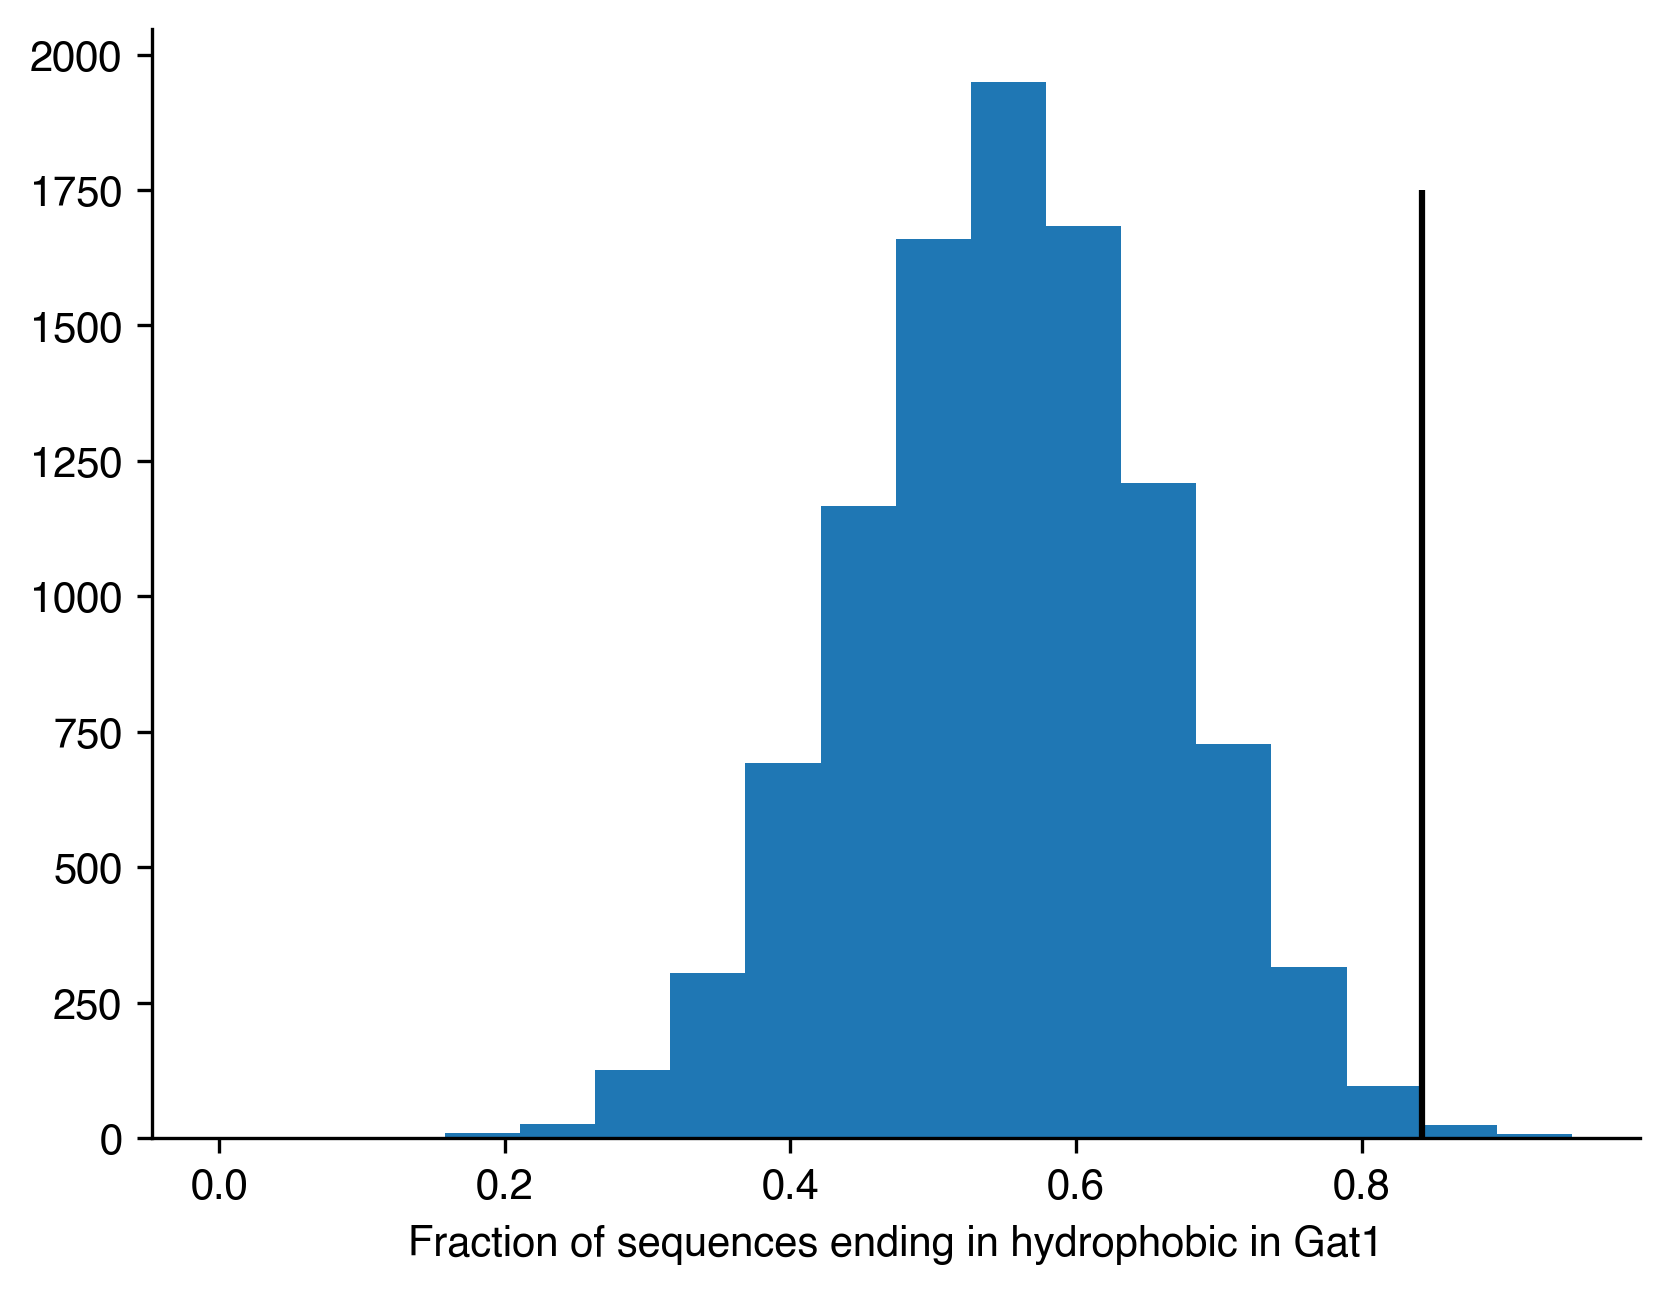

In [10]:
TF = "Gat1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
print("Total seqs:", len(TF_seqs))

permutations = generate_random_ends_strict(TF_seqs["aa_seq"].values)

observed = get_observed(TF_seqs['aa_seq'].values)

hydrophobics = []

for perm in permutations:
    hydrophobics.append(percent_hydrophobic(perm))

plt.hist(hydrophobics, bins=np.arange(0, 1, 1/len(TF_seqs)))
plt.vlines(percent_hydrophobic(observed), ymin=0, ymax=1750, color="black")
plt.xlabel(f"Fraction of sequences ending in hydrophobic in {TF}")

sns.despine()

Sef1 0.0
Sef1 1.0
Pdr1 0.1908
Pdr1 0.6781
Sum1 0.7376
Sum1 0.1292
Oaf1 0.9933
Oaf1 0.0024
Pip2 0.9947
Pip2 0.0023
Put3 0.9645
Put3 0.0085
Aro80 0.9827
Aro80 0.002
Stb4 0.0005
Stb4 0.998
War1 0.134
War1 0.754
Ppr1 0.0001
Ppr1 0.9991
Gal4 0.4552
Gal4 0.2801
Oaf3 0.0457
Oaf3 0.8827
Yrr1 0.1736
Yrr1 0.6931
Yrm1 0.5428
Yrm1 0.2313
Urc2 0.4078
Urc2 0.3617
Gln3 0.0
Gln3 1.0
Haa1 0.0002
Haa1 0.9982
Cha4 0.1094
Cha4 0.751
Rdr1 0.0
Rdr1 0.9948
Gat1 0.0005
Gat1 0.9975
Rtg3 1.0
Rtg3 0.0
Aft2 0.9079
Aft2 0.0395
Hac1 0.225
Hac1 0.6233
Cup2 0.0002
Cup2 0.9984


# Making relevant figures

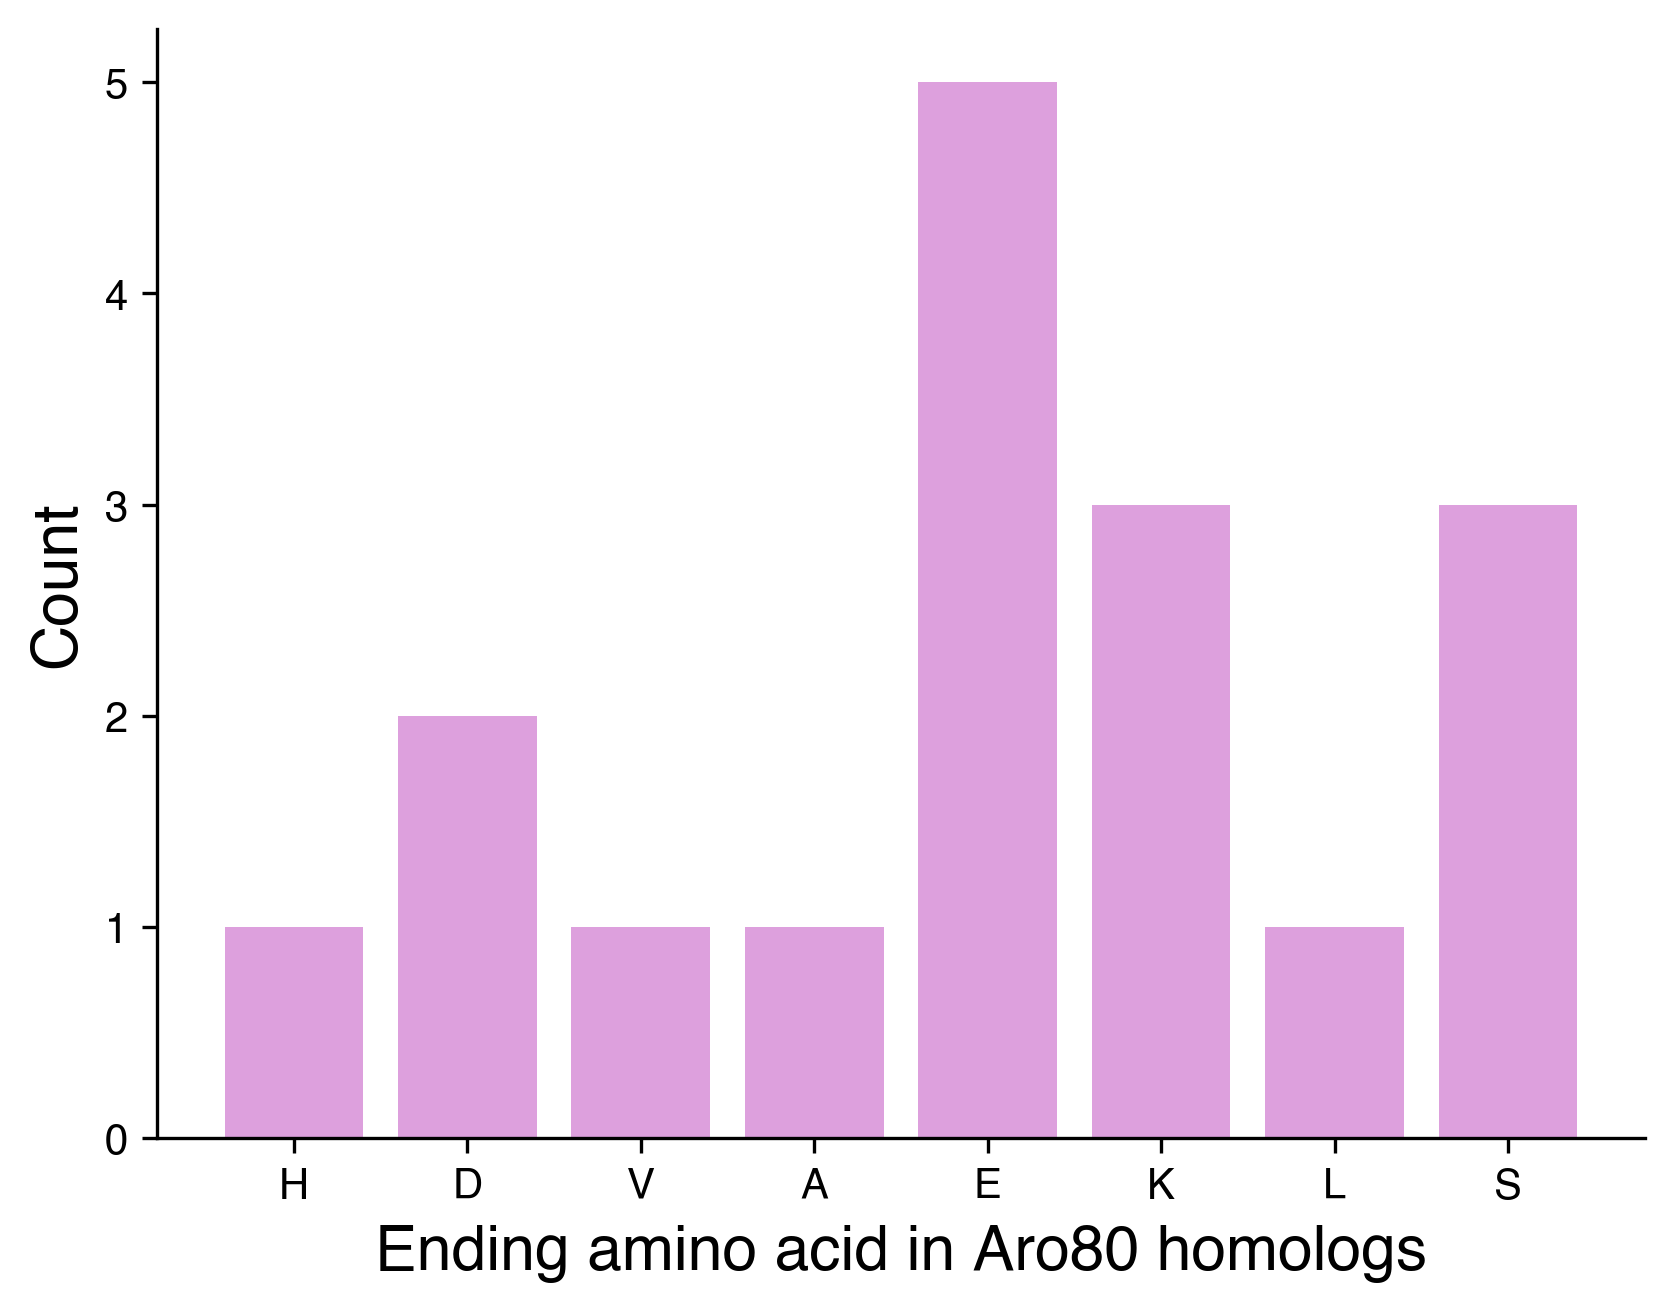

In [29]:
import seaborn as sns

TF = "Gal4"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)

plt.bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='plum')
plt.xlabel("Ending amino acid in Aro80 homologs", fontsize=15)
plt.ylabel("Count", fontsize=15)
sns.despine()

# plt.savefig("../figures/Aro80_ends.pdf")

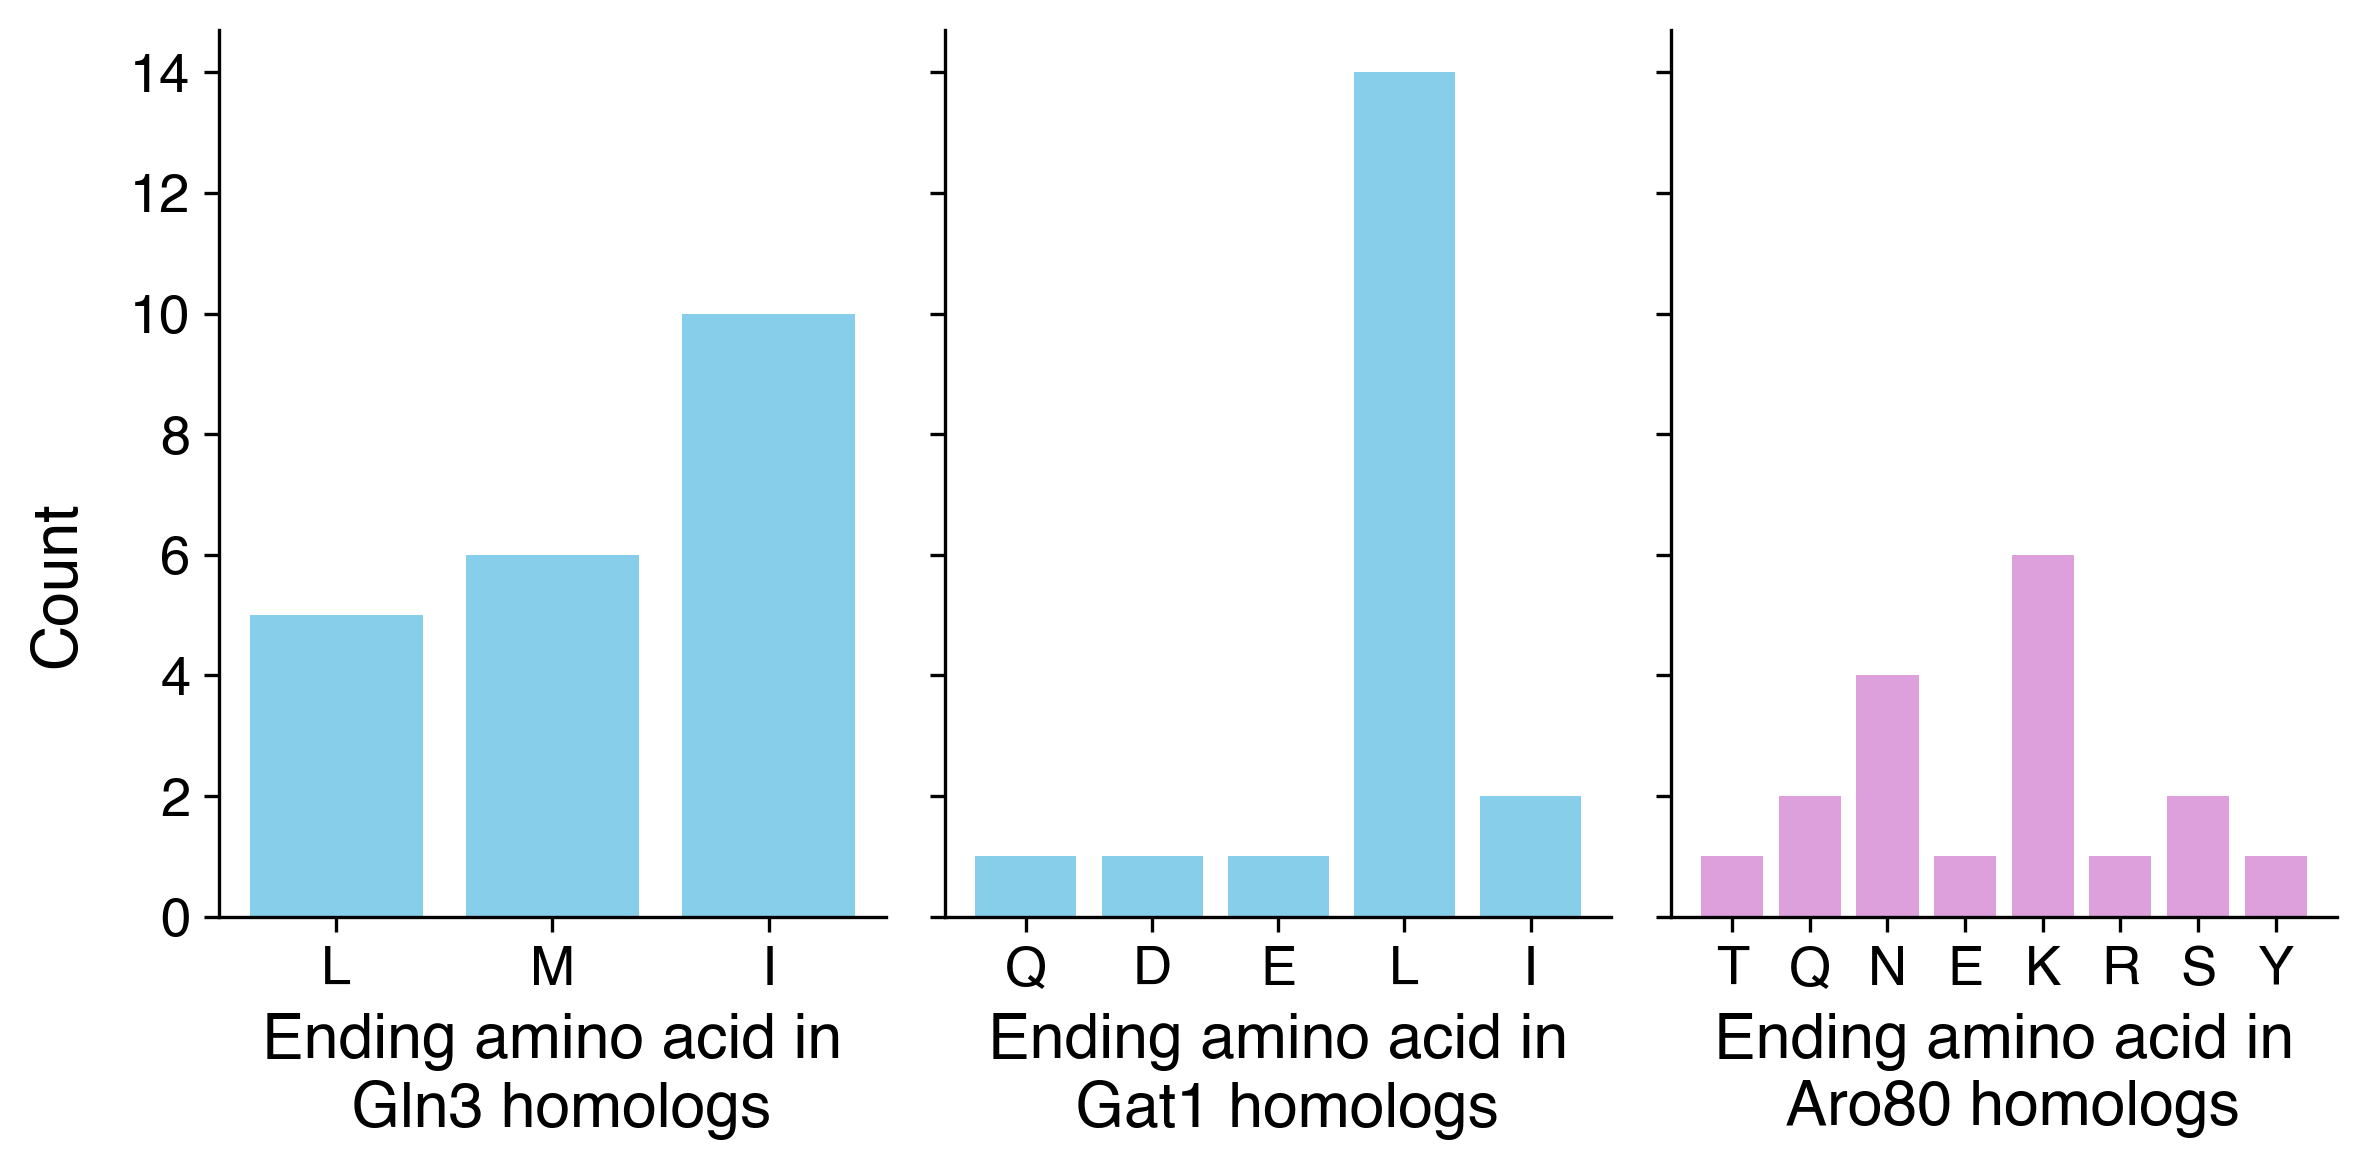

In [31]:
import seaborn as sns

fig, axs = plt.subplots(1,3, figsize=(8,4), sharey=True)
TF = "Gln3"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)

axs[0].bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='skyblue')
axs[0].set_xlabel("Ending amino acid in\n Gln3 homologs", fontsize=15, weight='bold')

axs[0].tick_params(labelsize=13)
for lbl in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Gat1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)
axs[1].bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='skyblue')
axs[1].set_xlabel("Ending amino acid in\n Gat1 homologs", fontsize=15, weight='bold')

axs[1].tick_params(labelsize=13)
for lbl in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Aro80"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

aa_counts = {}
for aa in set(observed):
    aa_counts[aa] = observed.count(aa)
axs[2].bar(range(len(aa_counts.keys())), height=aa_counts.values(), tick_label=aa_counts.keys(), color='plum')

axs[2].tick_params(labelsize=13)
for lbl in axs[2].get_xticklabels() + axs[2].get_yticklabels():
    lbl.set_fontweight("bold")

axs[2].set_xlabel("Ending amino acid in\n Aro80 homologs", fontsize=15, weight='bold')

fig.supylabel("Count", fontsize=15, weight='bold')
sns.despine()

plt.tight_layout()

# plt.savefig("../figures/Aro80_ends.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


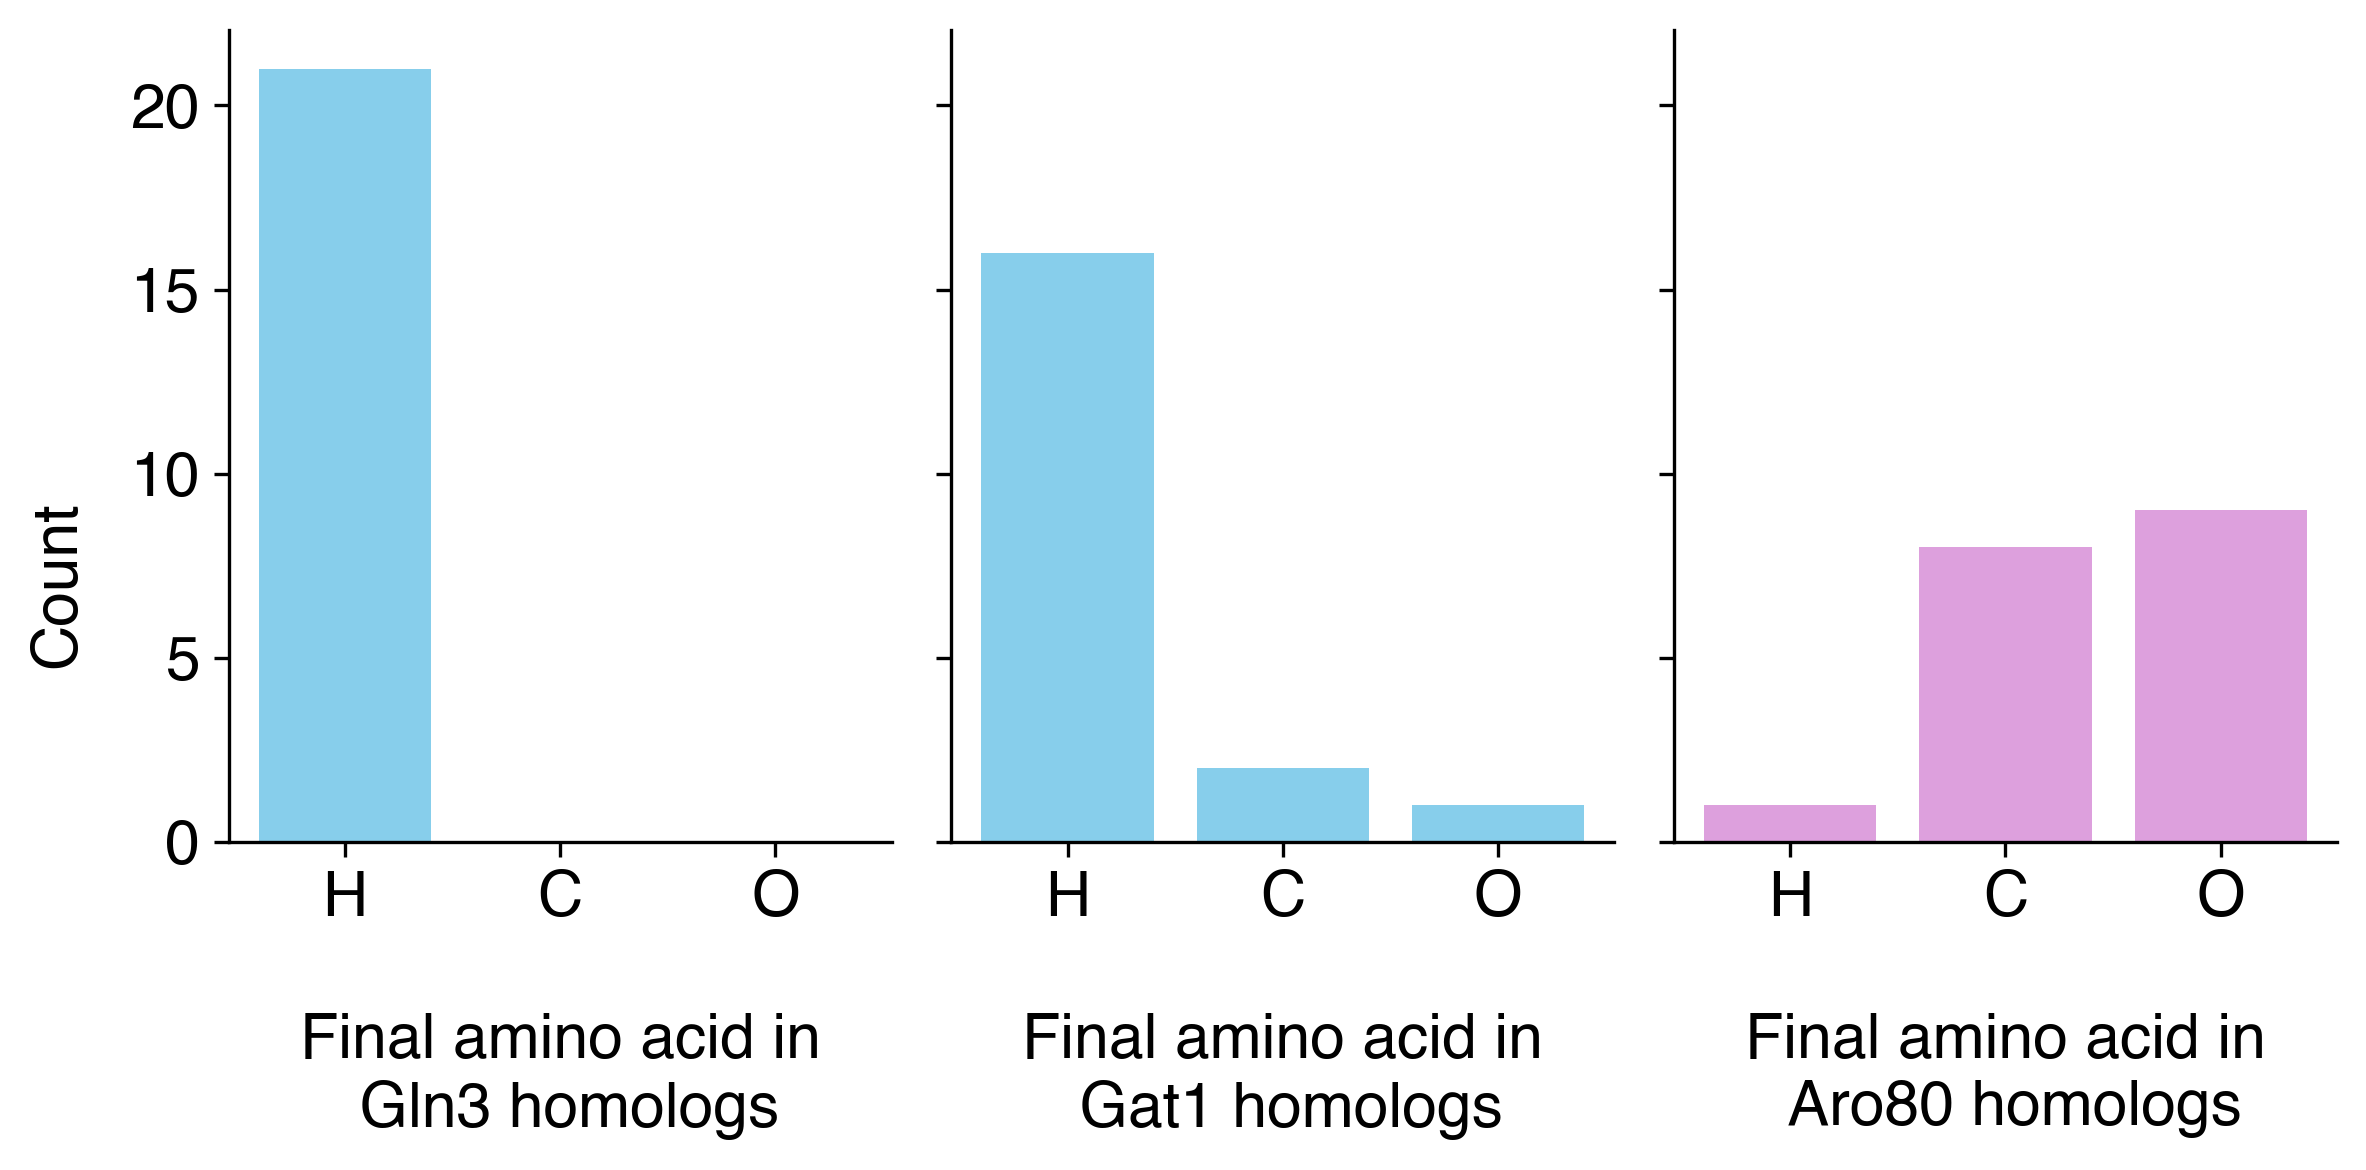

In [41]:
hydrophobics = ["W", "F", "L", "Y", "M", "I", "V", "A"]
charged = ["D", "E", "K", "R"]

fig, axs = plt.subplots(1,3, figsize=(8,4), sharey=True)
TF = "Gln3"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

type_counts = {"H" : 0, 'C' : 0, 'O' : 0}
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["H"] += observed.count(aa)
    elif aa in charged:
        type_counts["C"] += observed.count(aa)
    else: 
        type_counts["O"] += observed.count(aa)

axs[0].bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='skyblue')
axs[0].set_xlabel("\nFinal amino acid in\n Gln3 homologs", fontsize=15, weight='bold')

axs[0].tick_params(labelsize=15)
for lbl in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Gat1"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

type_counts = {"H" : 0, 'C' : 0, 'O' : 0}
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["H"] += observed.count(aa)
    elif aa in charged:
        type_counts["C"] += observed.count(aa)
    else: 
        type_counts["O"] += observed.count(aa)
axs[1].bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='skyblue')
axs[1].set_xlabel("\nFinal amino acid in\n Gat1 homologs", fontsize=15, weight='bold')

axs[1].tick_params(labelsize=15)
for lbl in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    lbl.set_fontweight("bold")

TF = "Aro80"
TF_seqs = read_fasta(f"../ygob_seqs/{TF}.fasta")
observed = get_observed(TF_seqs['aa_seq'].values)

type_counts = {"H" : 0, 'C' : 0, 'O' : 0}
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["H"] += observed.count(aa)
    elif aa in charged:
        type_counts["C"] += observed.count(aa)
    else: 
        type_counts["O"] += observed.count(aa)

axs[2].bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='plum')
axs[2].set_xlabel("\nFinal amino acid in\n Aro80 homologs", fontsize=15, weight='bold')

axs[2].tick_params(labelsize=15)
for lbl in axs[2].get_xticklabels() + axs[2].get_yticklabels():
    lbl.set_fontweight("bold")

fig.supylabel("Count", fontsize=15, weight='bold')
sns.despine()

plt.tight_layout()

plt.savefig("../figures/TF_ends.pdf", format='pdf', bbox_inches='tight')

# Looking at all y1000+ sequences

In [65]:
Sef1 = read_fasta("/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/orthogroups/Ppr1/Ppr1_orthologs.fasta")
Sef1

,name,aa_seq
0,g001431.m1_alloascoidea_hylecoeti.final,MDSVKDSVKTAKTVQPKRKRQKRATKSSTPSTINXLKSPSGFGVSN...
1,g005823.m1_alloascoidea_hylecoeti.final,MEMVACAVPGFSPSPSPQVHQPRSFHACERCHRRKKKCDKALPTCI...
2,g007243.m1_alloascoidea_hylecoeti.final,MHPRPSQSPQLPRPPTSSPPEPKRQRKSNDKVYKNSIIKFSAVPST...
3,g000449.m1_arxula_adeninivorans.final,MESKENPQASQACERCHRRKKKCDKTLPRCSACLSADAKCEYANAT...
4,g000828.m1_arxula_adeninivorans.final,MVEEASDNSRRLPACERCRIRKTKCDSQLPSCSNCSKAGAECINKD...
...,...,...
2378,g001959.m1_yHQL527_Metschnikowia_sp_nov_plate3...,MGRKPKVNKDEGKKPKEITESSDSHRLTRLITACRRCRYRKVKCDK...
2379,g005315.m1_yHQL527_Metschnikowia_sp_nov_plate3...,MSTPASAISDTSSPDDRKRAADSGGNNSRPNTKKSRGTASVLGISR...
2380,g005340.m1_yHRVM31_Schwanniomyces_sp_nov_plate...,MTSKKRKQSEYEDVSTKSHRPSSTIIGISRSISACQRCRLKKVRCD...
2381,g001047.m1_yarrowia_lipolytica.final,MKRKMEEDIPTPTEPPSAKQPRQSMARSVSACVRCRKRKSKCDQKF...


In [66]:
Sef1["final_aa"] = get_observed(Sef1['aa_seq'])

<BarContainer object of 20 artists>

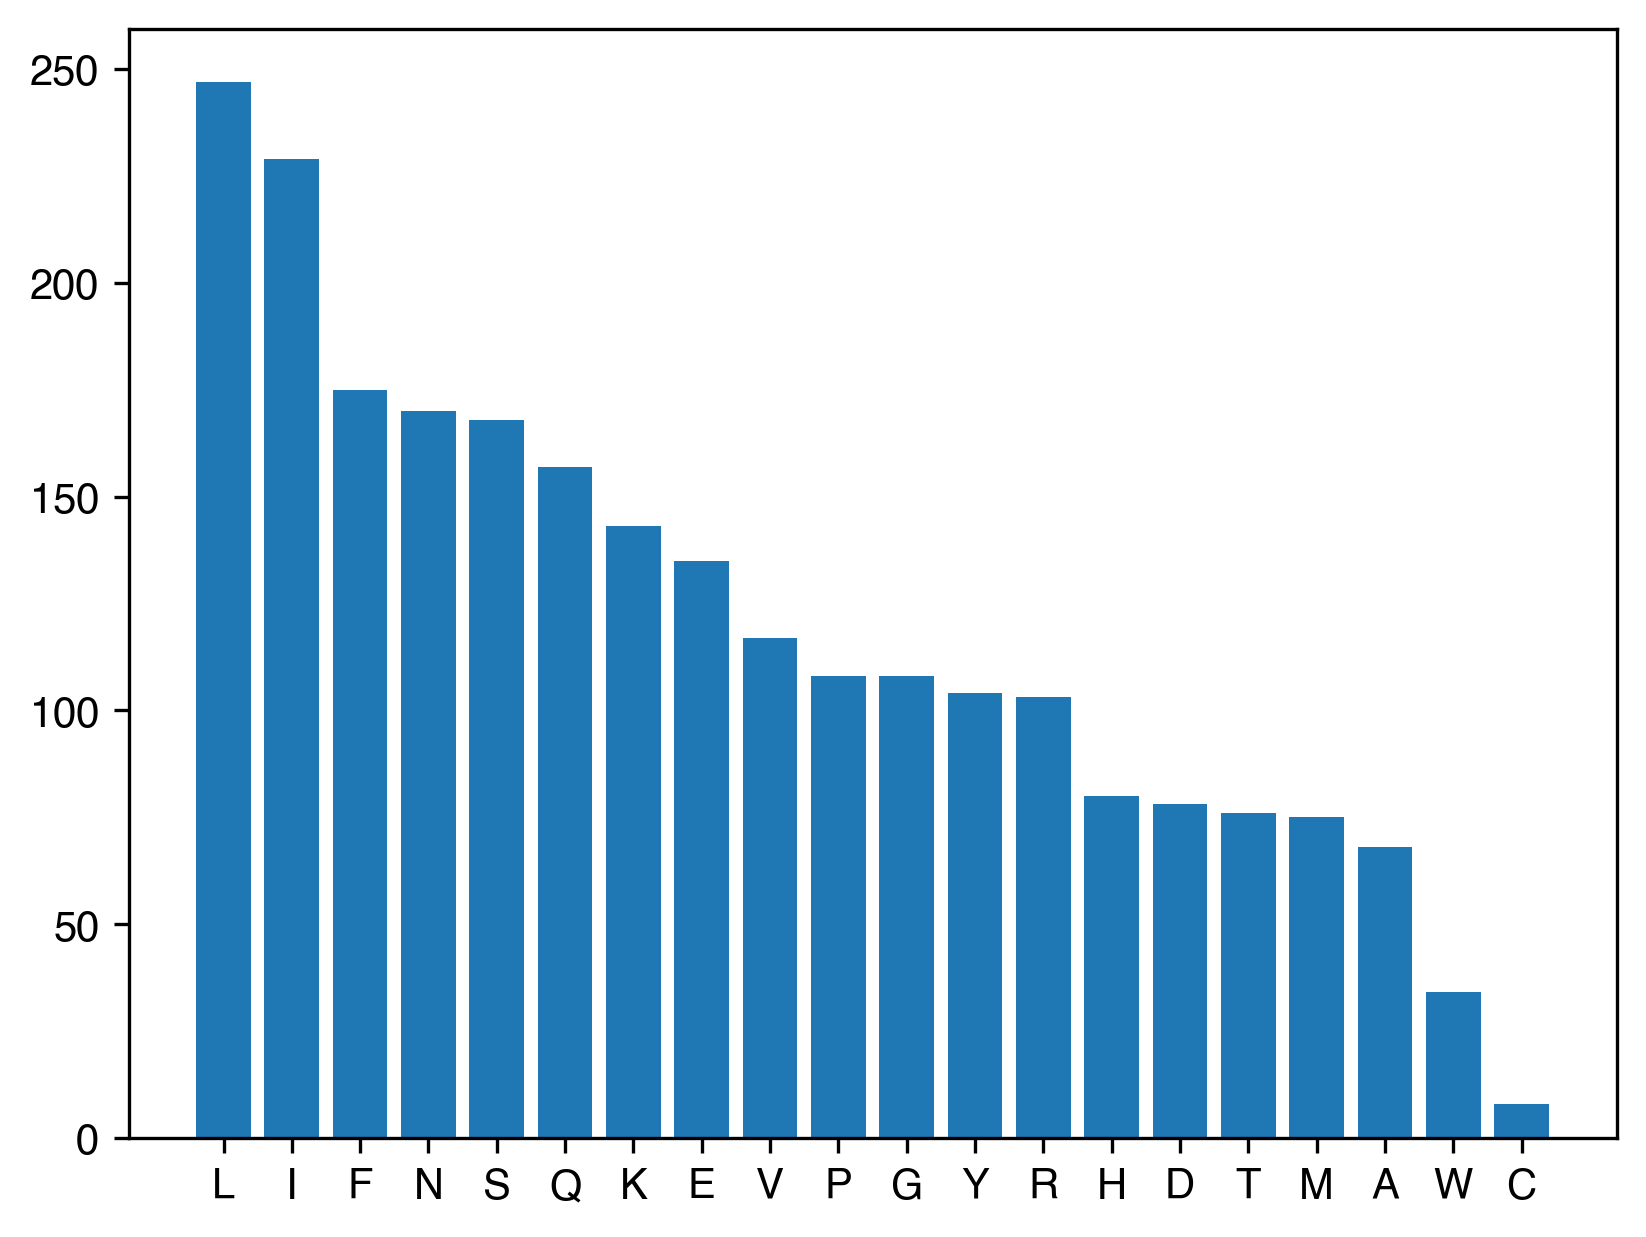

In [67]:
plt.bar(Sef1["final_aa"].value_counts().index, Sef1["final_aa"].value_counts())

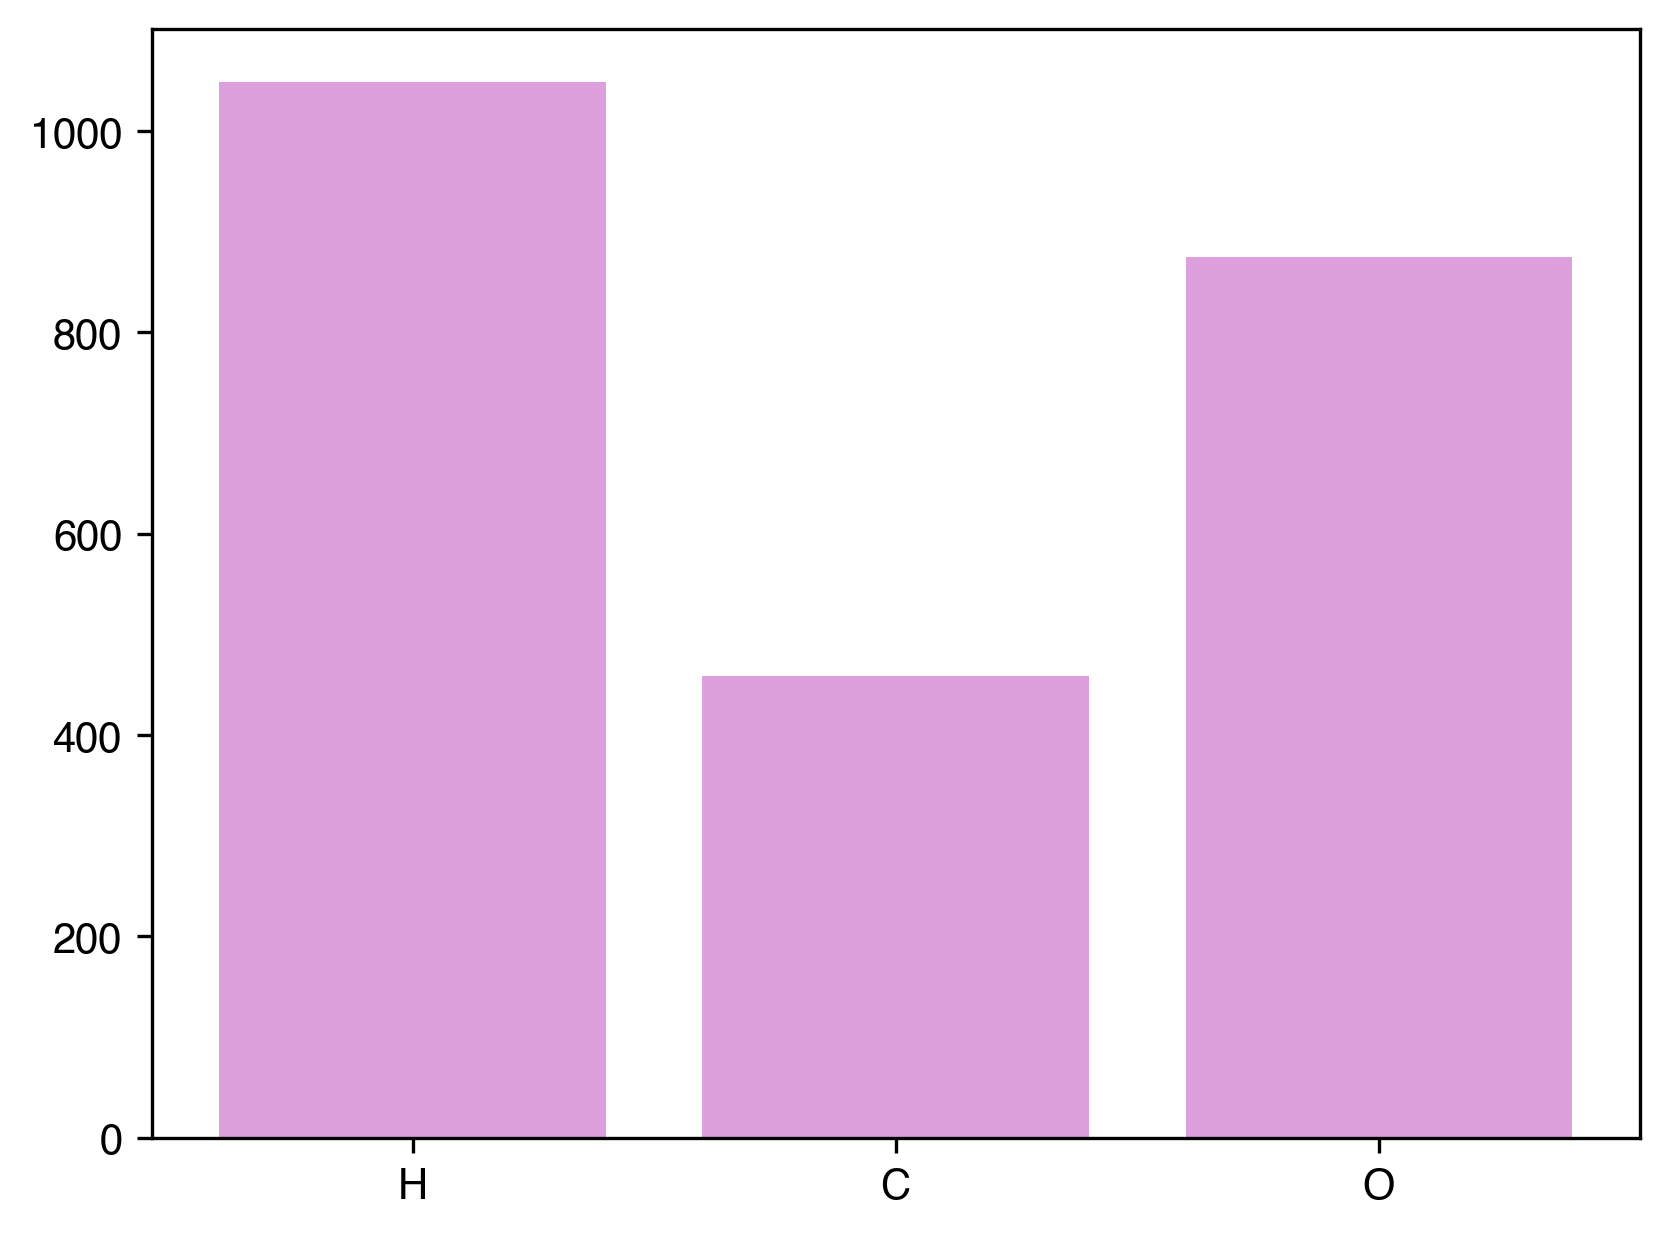

In [68]:
type_counts = {"H" : 0, 'C' : 0, 'O' : 0}
observed = get_observed(Sef1['aa_seq'])
for aa in set(observed):
    if aa in hydrophobics:
        type_counts["H"] += observed.count(aa)
    elif aa in charged:
        type_counts["C"] += observed.count(aa)
    else: 
        type_counts["O"] += observed.count(aa)

plt.bar(range(len(type_counts.keys())), height=type_counts.values(), tick_label=type_counts.keys(), color='plum')
plt.show()
# axs[2].set_xlabel("\nFinal amino acid in\n Aro80 homologs", fontsize=15, weight='bold')